In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Harshil\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Harshil\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Harshil\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Harsh

#cifar100 is a set of This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [2]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS=32

In [3]:
# CONSTANT
BATCH_SIZE=128
NB_EPOCH=20
NB_CLASSES=10
VERBOSE=1
VALIDATION_SPLIT=0.2
OPTIM =RMSprop()


In [4]:
# LOAD DATASET
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print('X_train shape ',X_train.shape)
print(X_train.shape[0],'train samples ')
print(X_test.shape[0],'train samples ')



X_train shape  (50000, 32, 32, 3)
50000 train samples 
10000 train samples 


In [5]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train,NB_CLASSES)
Y_test = np_utils.to_categorical(y_test,NB_CLASSES)
# print('Y_train',Y_train)
# print('Y_test',Y_test)

# float and normalization
X_train=X_train.astype('float32')
X_test = X_test.astype('float32')
# print('X_train',X_train)
# print('X_test',X_test)
X_train /= 255
X_test /= 255


In [6]:
# model
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',
                input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [7]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [8]:
#Load the model
from keras.models import load_model
model = load_model('my_model10.h5')

In [9]:
# # train
# model.compile(loss='categorical_crossentropy',optimizer = OPTIM,
#              metrics=['accuracy'])
# model.fit(X_train,Y_train,batch_size=BATCH_SIZE,
#          epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT,
#          verbose=VERBOSE)
# score=model.evaluate(X_test,Y_test,
#                     batch_size=BATCH_SIZE,verbose = VERBOSE)

# print("Test score: ",score[0])
# print("Test Accuracy",score[1])


In [69]:
import scipy.misc

In [70]:
img_names=['cat.png','dog.png']

In [71]:
import numpy as np
from PIL import Image

In [72]:
# im = Image.open(r'C:\Users\Harshil\Desktop\Black-Cat-icon.png')
# print(im)
# print(im.shape)
# size=(32,32)
# out = im.resize(size)
# # out.save('resize-output.png')
# out=np.array(out)
# print(out)
# print(out.shape)
# print(type(out))

In [73]:
# scipy.misc.imread('Black-Cat-icon.jpg')
# import imageio
# im = imageio.imread('Black-Cat-icon.png')
# print(type(im))
# im.shape(32,32,3)  # im is a numpy array
# imageio.imwrite('imageio:cat-gray.jpg', im[:, :, 0])
# imgs=plt.imread('Black-Cat-icon.png')

import PIL.Image

# imgs = PIL.Image.open('cat2.jfif')

imgs = plt.imread('cat2.jfif')

# imgs = imgs.convert('RGB')

[[[203 198 194]
  [203 198 194]
  [203 198 194]
  ...
  [198 199 194]
  [198 199 194]
  [199 200 195]]

 [[204 199 195]
  [204 199 195]
  [204 199 195]
  ...
  [198 199 194]
  [198 199 194]
  [199 200 195]]

 [[204 199 195]
  [204 199 195]
  [204 199 195]
  ...
  [198 199 194]
  [198 199 194]
  [199 200 195]]

 ...

 [[199 204 207]
  [201 206 209]
  [201 206 209]
  ...
  [182 191 190]
  [173 181 183]
  [167 177 178]]

 [[199 204 207]
  [200 205 208]
  [201 206 209]
  ...
  [178 188 189]
  [169 181 181]
  [166 178 178]]

 [[199 204 207]
  [200 205 208]
  [201 206 209]
  ...
  [174 184 185]
  [167 179 179]
  [164 178 178]]]


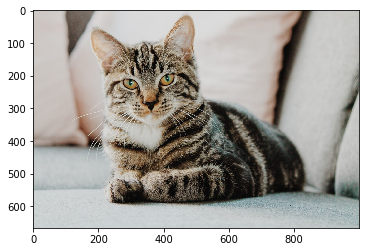

In [74]:
print(imgs)
plt.imshow(imgs)

In [75]:
# imgs=np.resize(imgs,(32,32,3))
# imgs = plt.imshow(imgs)

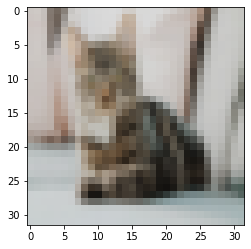

In [76]:
from skimage.transform import resize
imgs = resize(imgs,(32,32,3))
imgs = plt.imshow(imgs)
# print(imgs.shape)

In [80]:
# # print(imgs.shape)
# imgs=np.array(imgs)
imgs=np.reshape(imgs,(32,32,3))
print(type(imgs))
imgs=np.asarray(imgs)
print(type(imgs))
print(imgs.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
()


In [82]:

imgs=np.reshape(imgs,(32,32,3))
# model.predict_classes(imgs)

ValueError: cannot reshape array of size 1 into shape (32,32,3)

In [ ]:
model.predict_proba(imgs.reshape(1,32,32,3))

In [ ]:
model.save('my_model10.h5')